In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

Cargamos los archivos parquet, ya explicado en el notebook de transformaciones

In [2]:
df = pd.read_parquet('../datasets/movie_dataset.parquet')

In [3]:
df.head()

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,return
0,[Toy Story Collection],30000000.0,"[Animation, Comedy, Family]",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,[English],Released,None,Toy Story,7.7,5415.0,1995,12.451801
1,None,65000000.0,"[Adventure, Fantasy, Family]",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249.0,104.0,"[English, Français]",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995,4.043035
2,[Grumpy Old Men Collection],0.0,"[Romance, Comedy]",15602,en,A family wedding reignites the ancient feud be...,11.712900,"[Warner Bros., Lancaster Gate]",[United States of America],1995-12-22,0.0,101.0,[English],Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,1995,0.000000
3,None,16000000.0,"[Comedy, Drama, Romance]",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,81452156.0,127.0,[English],Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,1995,5.090760
4,[Father of the Bride Collection],0.0,[Comedy],11862,en,Just when George Banks has recovered from his ...,8.387519,"[Sandollar Productions, Touchstone Pictures]",[United States of America],1995-02-10,76578911.0,106.0,[English],Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,1995,inf


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45379 entries, 0 to 45465
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  4491 non-null   object        
 1   budget                 45376 non-null  float64       
 2   genres                 45379 non-null  object        
 3   id                     45379 non-null  object        
 4   original_language      45368 non-null  object        
 5   overview               44438 non-null  object        
 6   popularity             45376 non-null  float64       
 7   production_companies   45379 non-null  object        
 8   production_countries   45379 non-null  object        
 9   release_date           45376 non-null  datetime64[ns]
 10  revenue                45379 non-null  float64       
 11  runtime                45130 non-null  float64       
 12  spoken_languages       45376 non-null  object        
 13  s

De inicio podemos ver utilizando el .head y el .info; que el tipo de los datos disponibles en el dataframe es logico y no dificultaran el siguiente analisis.

Tambien, se puede evidenciar de manera obvia la falta de muchos datos en la columna de `belongs_to_collection` y en la columna de `tagline`. Veamos en mayor profundidad estos dos hechos.

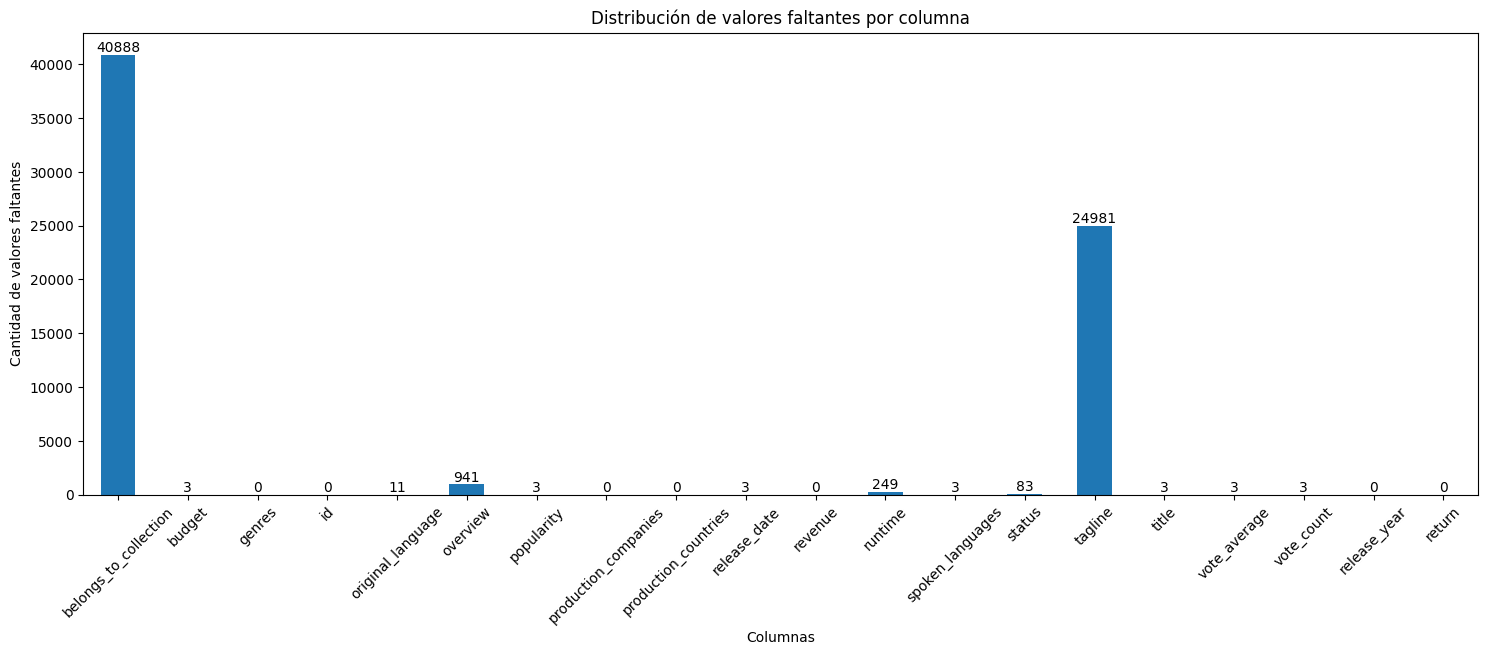

In [5]:
# Obtener el número de valores faltantes por columna
missing_values = df.isnull().sum()

# Crear el gráfico de barras
plt.figure(figsize=(18, 6))
missing_values.plot(kind='bar')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores faltantes')
plt.title('Distribución de valores faltantes por columna')
plt.xticks(rotation=45)
# Mostrar el número de datos correspondiente al posar el mouse sobre las barras
for i, value in enumerate(missing_values):
    plt.annotate(str(value), xy=(i, value), ha='center', va='bottom')

plt.show()

Podemos evidenciar la gran disparidad en la ausencia de datos entre `belongs_to_collection` y `tagline` con los demas, ademas de datos faltantes (En menor proporcion) en las demas columnas. Entremos en mayor detalle sobre la naturaleza de estas 2 columnas.

In [6]:
# Convertir los valores de las columnas 'belongs_to_collection' y 'tagline' a cadenas de texto
df['belongs_to_collection'] = df['belongs_to_collection'].astype(str)
df['tagline'] = df['tagline'].astype(str)

# Agrupar el DataFrame según la columna especificada y contar los valores
result = df.groupby('belongs_to_collection').size().reset_index(name='count')
result_2 = df.groupby('tagline').size().reset_index(name='count')
# Mostrar los resultados
display(result)
print('------------------------------------------------------------------------------')
display(result_2)

,belongs_to_collection,count
0,None,40888
1,['... Has Fallen Collection'],2
2,['00 Schneider Filmreihe'],1
3,['08/15 Collection'],1
4,['100 Girls Collection'],2
...,...,...
1641,['Чебурашка и крокодил Гена'],1
1642,['Что Творят мужчины! (Коллекция)'],2
1643,['男はつらいよ シリーズ'],3
1644,['식객 시리즈'],2


------------------------------------------------------------------------------


,tagline,count
0,,1
1,"""A great kid!"" ""A great bet!"" ""A great show!""",1
2,"""A simple prank, a game nobody won...""",1
3,"""All the world likes an outlaw. For some damn ...",1
4,"""An eye for an eye-a hate for a hate-that my g...",1
...,...,...
20265,…you won't be coming home!,1
20266,劇場版 クラナド,1
20267,日本は多様化している — Japan is Changing,1
20268,最后的舞者,1


Con los graficos anteriores podemos observar la razon de tantos valores faltantes en ambas columnas; No todas las peliculas hacen parte de una coleccion o una saga de peliculas, lo cual ocasione que haya tantos valores faltantes en estas; y en el caso de tagline, como su nombre traducido lo dice "Frase celebre", no todas tienen una misma.

In [7]:
df.describe(percentiles=[.50,.80,.90])

,budget,popularity,revenue,runtime,vote_average,vote_count,release_year,return
count,4.537600e+04,45376.000000,4.537900e+04,45130.000000,45376.000000,45376.000000,45379.000000,4.537900e+04
mean,4.232604e+06,2.926458,1.122936e+07,94.181675,5.624070,110.096439,1991.749510,inf
std,1.743986e+07,6.009672,6.438789e+07,38.341059,1.915423,491.742894,28.998404,NaN
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,0.000000e+00,1.130454,0.000000e+00,95.000000,6.000000,10.000000,2001.000000,0.000000e+00
80%,0.000000e+00,5.040993,0.000000e+00,110.000000,7.000000,50.000000,2012.000000,0.000000e+00
90%,8.000000e+06,8.334947,8.360367e+06,123.000000,7.400000,160.500000,2014.000000,2.255888e+00
max,3.800000e+08,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000,inf


Bueno, bueno, bueno. Vamos por partes:

1. Encontramos que el promedio de retorno en las peliculas es infinito 💀💀💀 
2. Encontramos que como minimo el 80% de los datos en las columnas de `budget` y `revenue` son 0, al igual que en la columna de `return`

In [8]:
df.loc[df['return'].idxmax()]

belongs_to_collection                   ['Father of the Bride Collection']
budget                                                                 0.0
genres                                                            [Comedy]
id                                                                   11862
original_language                                                       en
overview                 Just when George Banks has recovered from his ...
popularity                                                        8.387519
production_companies          [Sandollar Productions, Touchstone Pictures]
production_countries                            [United States of America]
release_date                                           1995-02-10 00:00:00
revenue                                                         76578911.0
runtime                                                              106.0
spoken_languages                                                 [English]
status                   

A la hora de crear la columna de `return` en el notebook de `transformation.ipnyb`, se dividieron los valores en la columna de `revenue` entre los valores en la columna de `budget`; y por conocimiento matematico, todo numero dividido entre 0 es indeterminado. Creando asi este particular error en el analisis de los datos.

Veamos hasta cuanto se ha estendido este error, ya que como se apunto en el punto 2, como minimo el 80% de los datos en estas 2 columnas son 0.

In [9]:
df['return'].value_counts()

0.000000     37972
inf           2026
1.000000        20
2.000000        12
4.000000        11
             ...  
17.000000        1
0.277950         1
5.411653         1
4.777778         1
0.282600         1
Name: return, Length: 5233, dtype: int64

1. Podemos encontrar que la gran mayoria del retorno de las peliculas es 0:
   Esto puede ser debido a la gran cantidad de datos equivalentes a 0 en la columna de revenue, toda division con un numero igual a 0, va a ser 0.
2. Podemos observar lo apuntado anteriormente, 2026 casos con un retorno indeterminado, causando el impactante
   error del inicio.

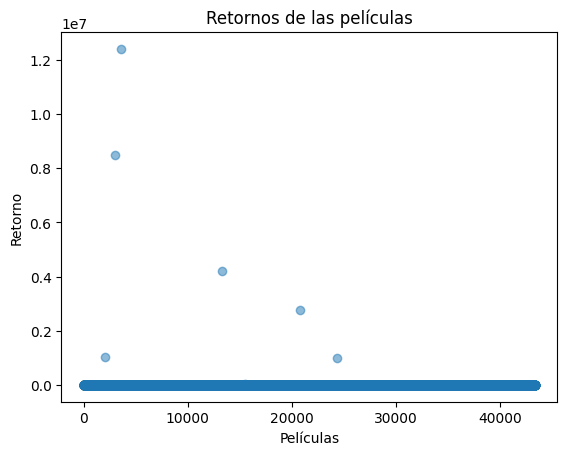

In [10]:
# Filtrar los valores infinitos
filtered_returns = df['return'][np.isfinite(df['return'])]

# Crear el scatter plot
plt.scatter(range(len(filtered_returns)), filtered_returns, alpha=0.5)

# Agregar etiquetas y título
plt.xlabel('Películas')
plt.ylabel('Retorno')
plt.title('Retornos de las películas')

# Mostrar el scatter plot
plt.show()

Con esta grafica podemos ver en mayor proporcion cual grande es la cantidad de de peliculas con un retorno de 0. (En esta grafica se excluyeron los datos con valor infinito)

En el caso de la columna de `release_year`, podemos encontrar la particularidad de que el valor minimo el 0... 

In [18]:
df.loc[df['release_year'].idxmin()]

belongs_to_collection                                                   []
budget                                                                 NaN
genres                   [Carousel Productions, Vision View Entertainme...
id                                                              1997-08-20
original_language                                                    104.0
overview                                                          Released
popularity                                                             NaN
production_companies                                                    []
production_countries                                                    []
release_date                                                           NaT
revenue                                                                0.0
runtime                                                                NaN
spoken_languages                                                      None
status                   

Como observamos el error se encuentra en la columna de `release_date`, la cual esta vacia; tambien encontramos que los demas campos estan practicamente vacios y la verdadera fecha de salida esta ubicada en otra columna, especificamente la columna de `id`.

Veamos si esto sucede en otros registros.

In [19]:
df.loc[df['release_year'] == 0]

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,return
19730,[],NaN,"[Carousel Productions, Vision View Entertainme...",1997-08-20,104.0,Released,NaN,[],[],NaT,0.0,NaN,None,None,None,None,NaN,NaN,0,0.0
29503,[],NaN,"[Aniplex, GoHands, BROSTA TV, Mardock Scramble...",2012-09-29,68.0,Released,NaN,[],[],NaT,0.0,NaN,None,None,None,None,NaN,NaN,0,0.0
35587,[],NaN,"[Odyssey Media, Pulser Productions, Rogue Stat...",2014-01-01,82.0,Released,NaN,[],[],NaT,0.0,NaN,None,None,None,None,NaN,NaN,0,0.0


Como podemos observar, sucede lo mismo que en primer caso. Columnas vacias y las fechas en la columna de `id`.

### CONCLUSIONES:

1. La gran ausencia de datos, ademas del hecho de rellenar los espacios faltantes en la columna de `budget` por ceros, causo que apareciera un error como los infinitos en algunos registros.
2. Tambien sucede lo mismo que el punto anterior, pero con la columna de `revenue`, este toma el valor de 0 y todo numero que divida al cero, sera 0.
3. Las demas columnas pueden presentar valores atipicos, como lo puede ser el STD en la columna de `vote_count`, pero esto puede ser debido a la diferencia entre las cantidades de audencia entre las peliculas. Mayor audiencia, mayor numero de votos.